In [37]:
import pandas as pd
df = pd.read_csv("../datasets/diabetes_data.csv")
print(df.head())
print(df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [38]:
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


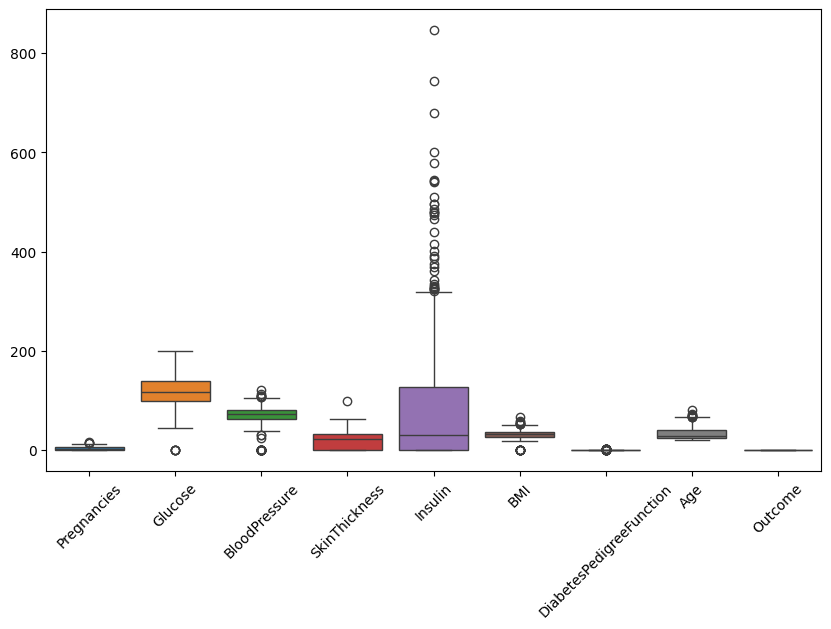

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [40]:
def assign_risk_level(row):
    if (
        row["Glucose"] < 100 and
        row["BMI"] < 25 and
        row["BloodPressure"] < 80
    ):
        return "Low"

    elif (
        100 <= row["Glucose"] <= 125 and
        25 <= row["BMI"] <= 30 and
        120 <= row["BloodPressure"] <= 90
    ):
        return "Moderate"

    else:
        return "High"

df["Risk_Level"] = df.apply(assign_risk_level, axis=1)
df.drop("Outcome", axis=1, inplace=True)  # Remove binary outcome column



In [41]:
from sklearn.preprocessing import MinMaxScaler
import pickle

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Save the processed dataset
df.to_csv("../datasets/diabetes_data_preprocessed.csv", index=False)

# Save the scaler for future use
with open("../models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

/tmp/ipykernel_11099/1905050281.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.35294118 0.05882353 0.47058824 0.05882353 0.         0.29411765
 0.17647059 0.58823529 0.11764706 0.47058824 0.23529412 0.58823529
 0.58823529 0.05882353 0.29411765 0.41176471 0.         0.41176471
 0.05882353 0.05882353 0.17647059 0.47058824 0.41176471 0.52941176
 0.64705882 0.58823529 0.41176471 0.05882353 0.76470588 0.29411765
 0.29411765 0.17647059 0.17647059 0.35294118 0.58823529 0.23529412
 0.64705882 0.52941176 0.11764706 0.23529412 0.17647059 0.41176471
 0.41176471 0.52941176 0.41176471 0.         0.05882353 0.11764706
 0.41176471 0.41176471 0.05882353 0.05882353 0.29411765 0.47058824
 0.41176471 0.05882353 0.41176471 0.         0.         0.
 0.11764706 0.47058824 0.29411765 0.11764706 0.41176471 0.29411765
 0.         0.11764706 0.05882353 0.23529412 0.11764706 0.29411765
 0.76470588 0.23529412 0.05882353 0.05882353 0.4

In [42]:
df.to_csv("../datasets/diabetes_data_preprocessed.csv", index=False)